In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

plt.style.use('../style.mplstyle')
df = pd.read_csv("../latest.csv")

c:\Users\sevi\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = fix_data(df, drop_zeros=False)

In [3]:
print("length of df: ", len(df))
print('\n')
df.head(1)

length of df:  106




,StartDate,reading,Duration,Progress,Finished,Q42,Q43,Q1,Q1_7_TEXT,Q2,...,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17,Q18,Q46
0,2024-08-08 23:30:29,7,118,100,True,Agree,LinkedIn DM,Industry,NaN,2.0,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN


# Pie chart (TYPE OF EXPERT)

In [4]:
df['Q1']

0      Industry
1      Industry
2      Academic
3      Industry
4      Industry
         ...   
101         NaN
102    Academic
103    Academic
104         NaN
105    Academic
Name: Q1, Length: 106, dtype: object

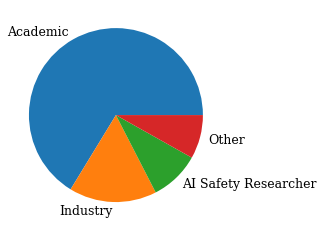

In [5]:
fig1, ax1 = plt.subplots()

# MAKE THE AUTOPCT SHOW the NUMBER OF PEOPLE who responded that way, NOT THE PERCENTAGE
ax1.pie(df['Q1'].value_counts(), labels=df['Q1'].value_counts().index)
# 

# increase the font size

fig1.savefig('figs/pie.pdf')

plt.show()

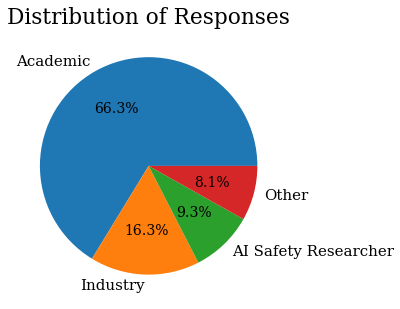

In [17]:
import matplotlib.pyplot as plt

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%'
    return my_autopct

fig1, ax1 = plt.subplots(figsize=(7, 5))

values = df['Q1'].value_counts()
# ax1.pie(values, labels=values.index, autopct=make_autopct(values))
wedges, texts, autotexts = ax1.pie(values, labels=values.index, autopct=make_autopct(values),
                                   textprops=dict(color="black"))
plt.setp(texts, size=15)
plt.setp(autotexts, size=14)

plt.title('Distribution of Responses')
fig1.savefig('figs/pie_with_percentages.pdf')
plt.show()